# Customer_Segmentation

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the datasets
Customer_data = pd.read_csv("Customerdata_Train.csv")
Email_data = pd.read_csv("Emaildata_Train.csv")
Transcation_data = pd.read_csv("transactionsdata_Train.csv")
Customer_target = pd.read_csv("Train_customer.csv")

**checking the shape of datasets**

In [3]:
Customer_data.shape

(23820, 7)

In [4]:
Email_data.shape

(517672, 6)

In [5]:
Transcation_data.shape

(104755, 4)

In [6]:
Customer_target.shape

(23820, 2)

**checking the datatypes**

In [7]:
Customer_data.dtypes

CustomerID              object
City                    object
DateOfRegistration      object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
dtype: object

In [8]:
Email_data.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [9]:
Transcation_data.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [10]:
Customer_target.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


**getting informations of the datasets**

In [11]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            23820 non-null  object
 1   City                  23820 non-null  object
 2   DateOfRegistration    23820 non-null  object
 3   OnlineCommunication   23820 non-null  int64 
 4   AutomaticRefill       23820 non-null  int64 
 5   DoorstepDelivery      23820 non-null  int64 
 6   PreferredDeliveryDay  23820 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.3+ MB


In [12]:
Email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517672 entries, 0 to 517671
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   517672 non-null  object
 1   DateOfemail  517672 non-null  object
 2   EmailType    517672 non-null  object
 3   timestamp    517672 non-null  object
 4   MailOpened   517672 non-null  object
 5   MailClicked  517672 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [13]:
Transcation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [14]:
Customer_target.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          23820 non-null  object
 1   RetentionPotential  23820 non-null  object
dtypes: object(2)
memory usage: 372.3+ KB


In [15]:
Customer_target.RetentionPotential.value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

**Email_data**

In [16]:
Email_data = Email_data.drop(['timestamp'], axis = 1)

In [17]:
Email_data

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable
...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,no,no
517669,C36140,2018-01-20,CustomizedEmail,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,yes,no


In [18]:
Email_data.MailOpened.value_counts()

no     369812
yes    147860
Name: MailOpened, dtype: int64

In [19]:
Email_data.value_counts()  

CustomerID  DateOfemail  EmailType        MailOpened  MailClicked  
C37441      2013-09-25   CustomizedEmail  no          no               46
C38053      2017-09-15   CustomizedEmail  no          no               46
C28089      2017-08-31   CustomizedEmail  no          no               46
C16160      2017-06-26   CustomizedEmail  no          no               46
C25577      2017-02-04   CustomizedEmail  no          no               45
                                                                       ..
C23053      2009-11-23   CustomizedEmail  no          no                1
            2009-11-22   CustomizedEmail  no          no                1
            2009-11-11   WelcomeEmail     yes         NotApplicable     1
C23052      2013-12-08   WelcomeEmail     yes         NotApplicable     1
C42189      2013-11-05   CustomizedEmail  yes         no                1
Length: 384217, dtype: int64

In [20]:
# Select relevant columns
Email_Data = Email_data[['CustomerID', 'MailOpened']]

# Filter by MailOpened column
Email_Data = Email_data[Email_data['MailOpened'].isin(['yes', 'no'])]

# Group by CustomerID and count MailOpened values
mail_opened = Email_Data.groupby('CustomerID')['MailOpened'].value_counts().unstack().fillna(0)

# Print the results
print(mail_opened)

MailOpened    no   yes
CustomerID            
C12116      27.0   5.0
C12117       0.0   1.0
C12118       0.0   1.0
C12119      28.0  14.0
C12120       0.0   1.0
...          ...   ...
C42185      34.0  10.0
C42186       0.0   1.0
C42187       0.0   1.0
C42188       0.0   1.0
C42189      32.0  19.0

[23820 rows x 2 columns]


In [21]:
Email_Data = pd.merge(Email_Data,mail_opened, on = 'CustomerID')

In [22]:
Email_Data

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,no,yes
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,0.0,30.0
1,C16368,2013-05-20,CustomizedEmail,yes,no,0.0,30.0
2,C16368,2013-02-05,CustomizedEmail,yes,no,0.0,30.0
3,C16368,2012-11-26,CustomizedEmail,yes,no,0.0,30.0
4,C16368,2013-05-30,CustomizedEmail,yes,no,0.0,30.0
...,...,...,...,...,...,...,...
517667,C36140,2018-01-21,CustomizedEmail,no,no,2.0,7.0
517668,C36140,2018-01-20,CustomizedEmail,yes,yes,2.0,7.0
517669,C36140,2018-01-20,CustomizedEmail,yes,no,2.0,7.0
517670,C36140,2018-01-21,CustomizedEmail,yes,yes,2.0,7.0


In [23]:
#renaming
Email_Data.rename(columns={"no": "MailOpened_no", "yes": "MailOpened_yes"}, inplace=True)

In [24]:
Email_Data

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,MailOpened_no,MailOpened_yes
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,0.0,30.0
1,C16368,2013-05-20,CustomizedEmail,yes,no,0.0,30.0
2,C16368,2013-02-05,CustomizedEmail,yes,no,0.0,30.0
3,C16368,2012-11-26,CustomizedEmail,yes,no,0.0,30.0
4,C16368,2013-05-30,CustomizedEmail,yes,no,0.0,30.0
...,...,...,...,...,...,...,...
517667,C36140,2018-01-21,CustomizedEmail,no,no,2.0,7.0
517668,C36140,2018-01-20,CustomizedEmail,yes,yes,2.0,7.0
517669,C36140,2018-01-20,CustomizedEmail,yes,no,2.0,7.0
517670,C36140,2018-01-21,CustomizedEmail,yes,yes,2.0,7.0


In [25]:
# Select relevant columns
Email_Data_1 = Email_Data[['CustomerID', 'MailClicked']]

# Filter by MailOpened column
Email_Data_1 = Email_Data[Email_Data['MailClicked'].isin(['yes', 'no','NotApplicable'])]

# Group by CustomerID and count MailOpened values
MailClicked = Email_Data_1.groupby('CustomerID')['MailClicked'].value_counts().unstack().fillna(0)

# Print the results
print(MailClicked)

MailClicked  NotApplicable    no  yes
CustomerID                           
C12116                 1.0  29.0  2.0
C12117                 1.0   0.0  0.0
C12118                 1.0   0.0  0.0
C12119                 1.0  37.0  4.0
C12120                 1.0   0.0  0.0
...                    ...   ...  ...
C42185                 1.0  43.0  0.0
C42186                 1.0   0.0  0.0
C42187                 1.0   0.0  0.0
C42188                 1.0   0.0  0.0
C42189                 1.0  50.0  0.0

[23820 rows x 3 columns]


In [26]:
Email_Data = pd.merge(Email_Data_1,MailClicked, on = 'CustomerID')

In [27]:
Email_Data

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,MailOpened_no,MailOpened_yes,NotApplicable,no,yes
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,0.0,30.0,1.0,28.0,1.0
1,C16368,2013-05-20,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
2,C16368,2013-02-05,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
3,C16368,2012-11-26,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
4,C16368,2013-05-30,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
...,...,...,...,...,...,...,...,...,...,...
517667,C36140,2018-01-21,CustomizedEmail,no,no,2.0,7.0,1.0,5.0,3.0
517668,C36140,2018-01-20,CustomizedEmail,yes,yes,2.0,7.0,1.0,5.0,3.0
517669,C36140,2018-01-20,CustomizedEmail,yes,no,2.0,7.0,1.0,5.0,3.0
517670,C36140,2018-01-21,CustomizedEmail,yes,yes,2.0,7.0,1.0,5.0,3.0


In [28]:
#renaming
Email_Data.rename(columns={"no": "MailClicked_no", "yes": "MailClicked_yes", "NotApplicable": "MailClicked_NotApplicable"}, inplace=True)

In [29]:
Email_Data

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,MailOpened_no,MailOpened_yes,MailClicked_NotApplicable,MailClicked_no,MailClicked_yes
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,0.0,30.0,1.0,28.0,1.0
1,C16368,2013-05-20,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
2,C16368,2013-02-05,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
3,C16368,2012-11-26,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
4,C16368,2013-05-30,CustomizedEmail,yes,no,0.0,30.0,1.0,28.0,1.0
...,...,...,...,...,...,...,...,...,...,...
517667,C36140,2018-01-21,CustomizedEmail,no,no,2.0,7.0,1.0,5.0,3.0
517668,C36140,2018-01-20,CustomizedEmail,yes,yes,2.0,7.0,1.0,5.0,3.0
517669,C36140,2018-01-20,CustomizedEmail,yes,no,2.0,7.0,1.0,5.0,3.0
517670,C36140,2018-01-21,CustomizedEmail,yes,yes,2.0,7.0,1.0,5.0,3.0


In [30]:
Email_Data = Email_Data.drop(['MailOpened','MailClicked'], axis=1)  

In [31]:
Email_Data

,CustomerID,DateOfemail,EmailType,MailOpened_no,MailOpened_yes,MailClicked_NotApplicable,MailClicked_no,MailClicked_yes
0,C16368,2012-09-28,WelcomeEmail,0.0,30.0,1.0,28.0,1.0
1,C16368,2013-05-20,CustomizedEmail,0.0,30.0,1.0,28.0,1.0
2,C16368,2013-02-05,CustomizedEmail,0.0,30.0,1.0,28.0,1.0
3,C16368,2012-11-26,CustomizedEmail,0.0,30.0,1.0,28.0,1.0
4,C16368,2013-05-30,CustomizedEmail,0.0,30.0,1.0,28.0,1.0
...,...,...,...,...,...,...,...,...
517667,C36140,2018-01-21,CustomizedEmail,2.0,7.0,1.0,5.0,3.0
517668,C36140,2018-01-20,CustomizedEmail,2.0,7.0,1.0,5.0,3.0
517669,C36140,2018-01-20,CustomizedEmail,2.0,7.0,1.0,5.0,3.0
517670,C36140,2018-01-21,CustomizedEmail,2.0,7.0,1.0,5.0,3.0


In [32]:
# Select relevant columns
Email_Data_2 = Email_Data[['CustomerID', 'EmailType']]

# Filter by MailOpened column
Email_Data_2 = Email_Data[Email_Data['EmailType'].isin(['WelcomeEmail', 'CustomizedEmail'])]

# Group by CustomerID and count MailOpened values
EmailType = Email_Data_2.groupby('CustomerID')['EmailType'].value_counts().unstack().fillna(0)

# Print the results
print(EmailType)

EmailType   CustomizedEmail  WelcomeEmail
CustomerID                               
C12116                 31.0           1.0
C12117                  0.0           1.0
C12118                  0.0           1.0
C12119                 41.0           1.0
C12120                  0.0           1.0
...                     ...           ...
C42185                 43.0           1.0
C42186                  0.0           1.0
C42187                  0.0           1.0
C42188                  0.0           1.0
C42189                 50.0           1.0

[23820 rows x 2 columns]


In [33]:
Email_Data = pd.merge(Email_Data_2,EmailType, on = 'CustomerID')

In [34]:
Email_Data

,CustomerID,DateOfemail,EmailType,MailOpened_no,MailOpened_yes,MailClicked_NotApplicable,MailClicked_no,MailClicked_yes,CustomizedEmail,WelcomeEmail
0,C16368,2012-09-28,WelcomeEmail,0.0,30.0,1.0,28.0,1.0,29.0,1.0
1,C16368,2013-05-20,CustomizedEmail,0.0,30.0,1.0,28.0,1.0,29.0,1.0
2,C16368,2013-02-05,CustomizedEmail,0.0,30.0,1.0,28.0,1.0,29.0,1.0
3,C16368,2012-11-26,CustomizedEmail,0.0,30.0,1.0,28.0,1.0,29.0,1.0
4,C16368,2013-05-30,CustomizedEmail,0.0,30.0,1.0,28.0,1.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...
517667,C36140,2018-01-21,CustomizedEmail,2.0,7.0,1.0,5.0,3.0,8.0,1.0
517668,C36140,2018-01-20,CustomizedEmail,2.0,7.0,1.0,5.0,3.0,8.0,1.0
517669,C36140,2018-01-20,CustomizedEmail,2.0,7.0,1.0,5.0,3.0,8.0,1.0
517670,C36140,2018-01-21,CustomizedEmail,2.0,7.0,1.0,5.0,3.0,8.0,1.0


In [35]:
Email_Data = Email_Data.drop(['EmailType'], axis=1) 

In [36]:
Email_Data

,CustomerID,DateOfemail,MailOpened_no,MailOpened_yes,MailClicked_NotApplicable,MailClicked_no,MailClicked_yes,CustomizedEmail,WelcomeEmail
0,C16368,2012-09-28,0.0,30.0,1.0,28.0,1.0,29.0,1.0
1,C16368,2013-05-20,0.0,30.0,1.0,28.0,1.0,29.0,1.0
2,C16368,2013-02-05,0.0,30.0,1.0,28.0,1.0,29.0,1.0
3,C16368,2012-11-26,0.0,30.0,1.0,28.0,1.0,29.0,1.0
4,C16368,2013-05-30,0.0,30.0,1.0,28.0,1.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...
517667,C36140,2018-01-21,2.0,7.0,1.0,5.0,3.0,8.0,1.0
517668,C36140,2018-01-20,2.0,7.0,1.0,5.0,3.0,8.0,1.0
517669,C36140,2018-01-20,2.0,7.0,1.0,5.0,3.0,8.0,1.0
517670,C36140,2018-01-21,2.0,7.0,1.0,5.0,3.0,8.0,1.0


In [37]:
Email_Data.drop_duplicates(subset=['CustomerID'], keep = 'first', inplace = True)

In [38]:
Email_Data

,CustomerID,DateOfemail,MailOpened_no,MailOpened_yes,MailClicked_NotApplicable,MailClicked_no,MailClicked_yes,CustomizedEmail,WelcomeEmail
0,C16368,2012-09-28,0.0,30.0,1.0,28.0,1.0,29.0,1.0
30,C20345,2010-12-19,7.0,89.0,1.0,85.0,10.0,95.0,1.0
126,C17683,2010-10-03,0.0,1.0,1.0,0.0,0.0,0.0,1.0
127,C18647,2010-11-27,3.0,28.0,1.0,26.0,4.0,30.0,1.0
158,C36692,2009-12-04,46.0,19.0,1.0,54.0,10.0,64.0,1.0
...,...,...,...,...,...,...,...,...,...
517659,C23511,2018-01-17,0.0,1.0,1.0,0.0,0.0,0.0,1.0
517660,C12197,2018-01-17,0.0,1.0,1.0,0.0,0.0,0.0,1.0
517661,C40967,2018-01-17,0.0,1.0,1.0,0.0,0.0,0.0,1.0
517662,C36140,2018-01-17,2.0,7.0,1.0,5.0,3.0,8.0,1.0


In [39]:
Email_Data.MailClicked_NotApplicable.value_counts()

1.0    23820
Name: MailClicked_NotApplicable, dtype: int64

In [40]:
#drop MailClicked_NotApplicable feature
Email_Data = Email_Data.drop(['MailClicked_NotApplicable'], axis=1)

In [41]:
Email_Data

,CustomerID,DateOfemail,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,WelcomeEmail
0,C16368,2012-09-28,0.0,30.0,28.0,1.0,29.0,1.0
30,C20345,2010-12-19,7.0,89.0,85.0,10.0,95.0,1.0
126,C17683,2010-10-03,0.0,1.0,0.0,0.0,0.0,1.0
127,C18647,2010-11-27,3.0,28.0,26.0,4.0,30.0,1.0
158,C36692,2009-12-04,46.0,19.0,54.0,10.0,64.0,1.0
...,...,...,...,...,...,...,...,...
517659,C23511,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0
517660,C12197,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0
517661,C40967,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0
517662,C36140,2018-01-17,2.0,7.0,5.0,3.0,8.0,1.0


**Transcation_data**

In [42]:
Transcation_data.value_counts()

CustomerID  DateOfOrder  timestamp  OrderQuantity
C12116      2013-10-03   13:49:08   38               1
C31623      2013-01-06   21:19:02   81               1
C31625      2013-06-23   18:29:00   24               1
            2013-06-22   10:44:50   29               1
            2013-06-21   13:42:20   24               1
                                                    ..
C22053      2013-04-15   17:04:56   214              1
            2013-04-05   13:06:42   235              1
            2013-03-24   21:27:00   204              1
            2013-03-09   17:14:08   235              1
C42189      2013-11-15   14:13:30   95               1
Length: 104755, dtype: int64

In [43]:
Transcation_data = Transcation_data.drop(['timestamp'], axis=1)

In [44]:
Transcation_data.head() 

,CustomerID,DateOfOrder,OrderQuantity
0,C16368,2013-08-11,15
1,C20345,2011-04-01,92
2,C20345,2012-06-29,95
3,C20345,2012-09-22,74
4,C20345,2011-08-23,81


In [45]:
num_orders = Transcation_data.groupby('CustomerID')['OrderQuantity'].count()

print(num_orders)

CustomerID
C12116     3
C12117     1
C12118     1
C12119     1
C12120     1
          ..
C42185    13
C42186     1
C42187     1
C42188     1
C42189     2
Name: OrderQuantity, Length: 23820, dtype: int64


In [46]:
# Group the orders DataFrame by customerID and sum the quantity column
customer_OrderQuantity = Transcation_data.groupby('CustomerID')['OrderQuantity'].sum()

# Print the sum of the quantity column for each customer
print(customer_OrderQuantity)

CustomerID
C12116     115
C12117      41
C12118      41
C12119      52
C12120      31
          ... 
C42185    1340
C42186      46
C42187      41
C42188      51
C42189     180
Name: OrderQuantity, Length: 23820, dtype: int64


In [47]:
Transcation_Data = pd.merge(Transcation_data,customer_OrderQuantity, on = 'CustomerID')

In [48]:
Transcation_Data

,CustomerID,DateOfOrder,OrderQuantity_x,OrderQuantity_y
0,C16368,2013-08-11,15,15
1,C20345,2011-04-01,92,15614
2,C20345,2012-06-29,95,15614
3,C20345,2012-09-22,74,15614
4,C20345,2011-08-23,81,15614
...,...,...,...,...
104750,C12197,2018-01-17,56,56
104751,C40967,2018-01-17,35,35
104752,C36140,2018-01-17,47,100
104753,C36140,2018-01-21,53,100


In [49]:
Transcation_Data = Transcation_Data.drop(['OrderQuantity_x'], axis=1)

In [50]:
Transcation_Data

,CustomerID,DateOfOrder,OrderQuantity_y
0,C16368,2013-08-11,15
1,C20345,2011-04-01,15614
2,C20345,2012-06-29,15614
3,C20345,2012-09-22,15614
4,C20345,2011-08-23,15614
...,...,...,...
104750,C12197,2018-01-17,56
104751,C40967,2018-01-17,35
104752,C36140,2018-01-17,100
104753,C36140,2018-01-21,100


In [51]:
#renaming
Transcation_Data.rename(columns={"OrderQuantity_y": "TotalNoOfOrders"}, inplace=True)

In [52]:
Transcation_Data

,CustomerID,DateOfOrder,TotalNoOfOrders
0,C16368,2013-08-11,15
1,C20345,2011-04-01,15614
2,C20345,2012-06-29,15614
3,C20345,2012-09-22,15614
4,C20345,2011-08-23,15614
...,...,...,...
104750,C12197,2018-01-17,56
104751,C40967,2018-01-17,35
104752,C36140,2018-01-17,100
104753,C36140,2018-01-21,100


In [53]:
Transcation_Data.drop_duplicates(subset=['CustomerID'], keep = 'first', inplace = True)

In [54]:
Transcation_Data

,CustomerID,DateOfOrder,TotalNoOfOrders
0,C16368,2013-08-11,15
1,C20345,2011-04-01,15614
187,C17683,2010-12-01,443
200,C18647,2010-11-29,748
207,C36692,2011-09-21,2350
...,...,...,...
104749,C23511,2018-01-17,41
104750,C12197,2018-01-17,56
104751,C40967,2018-01-17,35
104752,C36140,2018-01-17,100


**Customer_target**

In [55]:
Customer_target.shape

(23820, 2)

# Merging Datasets

In [56]:
# checking unique values
common_lst = []

for col in Customer_data.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in Email_Data.columns:
        common_lst.append(col)                                                  # Add the common columns in new list

print(common_lst)

['CustomerID']


In [57]:
Merge_1 = pd.merge(Customer_data,Email_Data, on = 'CustomerID')

In [58]:
Merge_1

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,WelcomeEmail
0,C16368,CITY2,28-09-2012,0,0,0,Monday,2012-09-28,0.0,30.0,28.0,1.0,29.0,1.0
1,C20345,CITY2,19-12-2010,1,1,1,Friday,2010-12-19,7.0,89.0,85.0,10.0,95.0,1.0
2,C17683,CITY2,03-10-2010,0,0,0,Wednesday,2010-10-03,0.0,1.0,0.0,0.0,0.0,1.0
3,C18647,CITY4,27-11-2010,0,0,0,Monday,2010-11-27,3.0,28.0,26.0,4.0,30.0,1.0
4,C36692,CITY2,04-12-2009,1,1,0,Friday,2009-12-04,46.0,19.0,54.0,10.0,64.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,17-01-2018,1,1,0,Friday,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0
23816,C12197,CITY3,17-01-2018,1,0,1,Friday,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0
23817,C40967,CITY3,17-01-2018,1,0,0,Saturday,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0
23818,C36140,CITY3,17-01-2018,1,1,0,Saturday,2018-01-17,2.0,7.0,5.0,3.0,8.0,1.0


In [59]:
# checking unique values
common_lst = []

for col in Transcation_Data.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in Customer_target.columns:
        common_lst.append(col)                                                  # Add the common columns in new list

print(common_lst)

['CustomerID']


In [60]:
Merge_2 = pd.merge(Transcation_Data,Customer_target, on = 'CustomerID' )

In [61]:
Merge_2

,CustomerID,DateOfOrder,TotalNoOfOrders,RetentionPotential
0,C16368,2013-08-11,15,High
1,C20345,2011-04-01,15614,Low
2,C17683,2010-12-01,443,Medium
3,C18647,2010-11-29,748,Low
4,C36692,2011-09-21,2350,Low
...,...,...,...,...
23815,C23511,2018-01-17,41,Low
23816,C12197,2018-01-17,56,Low
23817,C40967,2018-01-17,35,Low
23818,C36140,2018-01-17,100,Low


In [62]:
Customer_Total = pd.merge(Merge_1,Merge_2, on = 'CustomerID' )

In [63]:
Customer_Total

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,WelcomeEmail,DateOfOrder,TotalNoOfOrders,RetentionPotential
0,C16368,CITY2,28-09-2012,0,0,0,Monday,2012-09-28,0.0,30.0,28.0,1.0,29.0,1.0,2013-08-11,15,High
1,C20345,CITY2,19-12-2010,1,1,1,Friday,2010-12-19,7.0,89.0,85.0,10.0,95.0,1.0,2011-04-01,15614,Low
2,C17683,CITY2,03-10-2010,0,0,0,Wednesday,2010-10-03,0.0,1.0,0.0,0.0,0.0,1.0,2010-12-01,443,Medium
3,C18647,CITY4,27-11-2010,0,0,0,Monday,2010-11-27,3.0,28.0,26.0,4.0,30.0,1.0,2010-11-29,748,Low
4,C36692,CITY2,04-12-2009,1,1,0,Friday,2009-12-04,46.0,19.0,54.0,10.0,64.0,1.0,2011-09-21,2350,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,17-01-2018,1,1,0,Friday,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0,2018-01-17,41,Low
23816,C12197,CITY3,17-01-2018,1,0,1,Friday,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0,2018-01-17,56,Low
23817,C40967,CITY3,17-01-2018,1,0,0,Saturday,2018-01-17,0.0,1.0,0.0,0.0,0.0,1.0,2018-01-17,35,Low
23818,C36140,CITY3,17-01-2018,1,1,0,Saturday,2018-01-17,2.0,7.0,5.0,3.0,8.0,1.0,2018-01-17,100,Low


In [64]:
Customer_Total.WelcomeEmail.value_counts()

1.0    23820
Name: WelcomeEmail, dtype: int64

In [65]:
#drop WelcomeEmail feature
Customer_Total = Customer_Total.drop(['WelcomeEmail'], axis=1)

In [66]:
Customer_Total

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,DateOfOrder,TotalNoOfOrders,RetentionPotential
0,C16368,CITY2,28-09-2012,0,0,0,Monday,2012-09-28,0.0,30.0,28.0,1.0,29.0,2013-08-11,15,High
1,C20345,CITY2,19-12-2010,1,1,1,Friday,2010-12-19,7.0,89.0,85.0,10.0,95.0,2011-04-01,15614,Low
2,C17683,CITY2,03-10-2010,0,0,0,Wednesday,2010-10-03,0.0,1.0,0.0,0.0,0.0,2010-12-01,443,Medium
3,C18647,CITY4,27-11-2010,0,0,0,Monday,2010-11-27,3.0,28.0,26.0,4.0,30.0,2010-11-29,748,Low
4,C36692,CITY2,04-12-2009,1,1,0,Friday,2009-12-04,46.0,19.0,54.0,10.0,64.0,2011-09-21,2350,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,17-01-2018,1,1,0,Friday,2018-01-17,0.0,1.0,0.0,0.0,0.0,2018-01-17,41,Low
23816,C12197,CITY3,17-01-2018,1,0,1,Friday,2018-01-17,0.0,1.0,0.0,0.0,0.0,2018-01-17,56,Low
23817,C40967,CITY3,17-01-2018,1,0,0,Saturday,2018-01-17,0.0,1.0,0.0,0.0,0.0,2018-01-17,35,Low
23818,C36140,CITY3,17-01-2018,1,1,0,Saturday,2018-01-17,2.0,7.0,5.0,3.0,8.0,2018-01-17,100,Low


# EDA

In [68]:
Customer_Total.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
MailOpened_no           0
MailOpened_yes          0
MailClicked_no          0
MailClicked_yes         0
CustomizedEmail         0
DateOfOrder             0
TotalNoOfOrders         0
RetentionPotential      0
dtype: int64

In [69]:
Customer_Total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            23820 non-null  object 
 1   City                  23820 non-null  object 
 2   DateOfRegistration    23820 non-null  object 
 3   OnlineCommunication   23820 non-null  int64  
 4   AutomaticRefill       23820 non-null  int64  
 5   DoorstepDelivery      23820 non-null  int64  
 6   PreferredDeliveryDay  23820 non-null  object 
 7   DateOfemail           23820 non-null  object 
 8   MailOpened_no         23820 non-null  float64
 9   MailOpened_yes        23820 non-null  float64
 10  MailClicked_no        23820 non-null  float64
 11  MailClicked_yes       23820 non-null  float64
 12  CustomizedEmail       23820 non-null  float64
 13  DateOfOrder           23820 non-null  object 
 14  TotalNoOfOrders       23820 non-null  int64  
 15  RetentionPotential 

In [70]:
Customer_Total.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,TotalNoOfOrders
count,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615,15.525273,6.207389,19.563854,1.168808,20.732662,357.622922
std,0.473580,0.292821,0.190268,17.239732,8.517405,19.168208,2.376062,20.040546,1335.649680
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,41.000000
50%,1.000000,0.000000,0.000000,7.000000,2.000000,17.000000,0.000000,19.000000,65.000000
75%,1.000000,0.000000,0.000000,32.000000,8.000000,38.000000,1.000000,40.000000,169.000000
max,1.000000,1.000000,1.000000,91.000000,256.000000,249.000000,42.000000,291.000000,51429.000000


In [71]:
#drop WelcomeEmail feature
Customer_Total = Customer_Total.drop(['DateOfemail'], axis=1)

In [73]:
Customer_Total.head(2)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,DateOfOrder,TotalNoOfOrders,RetentionPotential
0,C16368,CITY2,28-09-2012,0,0,0,Monday,0.0,30.0,28.0,1.0,29.0,2013-08-11,15,High
1,C20345,CITY2,19-12-2010,1,1,1,Friday,7.0,89.0,85.0,10.0,95.0,2011-04-01,15614,Low


**Checking and Treating the outliers**

**MailOpened_yes**

<AxesSubplot:xlabel='MailOpened_yes'>

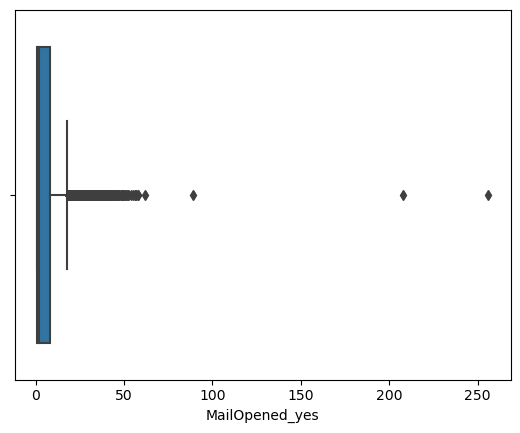

In [76]:
sns.boxplot(x=Customer_Total["MailOpened_yes"])

In [77]:
tenth_percentile=np.percentile(Customer_Total['MailOpened_yes'],10)
ninetieth_percentile=np.percentile(Customer_Total['MailOpened_yes'],90)
print(tenth_percentile,ninetieth_percentile)
Customer_Total['MailOpened_yes']=np.where(Customer_Total['MailOpened_yes']<tenth_percentile,tenth_percentile,Customer_Total['MailOpened_yes']) 
Customer_Total['MailOpened_yes']=np.where(Customer_Total['MailOpened_yes']>ninetieth_percentile,ninetieth_percentile,Customer_Total['MailOpened_yes'])

1.0 19.0


**MailClicked_no**

<AxesSubplot:xlabel='MailClicked_no'>

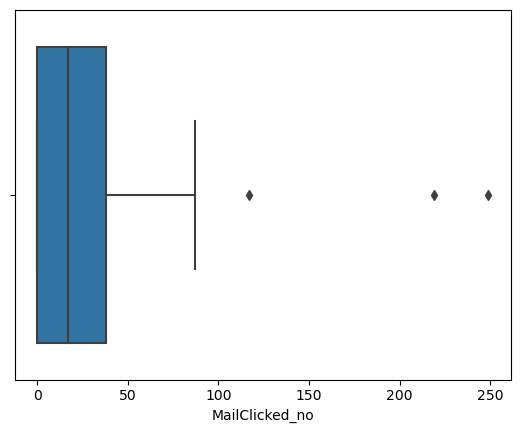

In [79]:
sns.boxplot(x=Customer_Total["MailClicked_no"])

In [80]:
tenth_percentile=np.percentile(Customer_Total['MailClicked_no'],10)
ninetieth_percentile=np.percentile(Customer_Total['MailClicked_no'],90)
print(tenth_percentile,ninetieth_percentile)
Customer_Total['MailClicked_no']=np.where(Customer_Total['MailClicked_no']<tenth_percentile,tenth_percentile,Customer_Total['MailClicked_no']) 
Customer_Total['MailClicked_no']=np.where(Customer_Total['MailClicked_no']>ninetieth_percentile,ninetieth_percentile,Customer_Total['MailClicked_no'])

0.0 45.0


**MailClicked_yes**

<AxesSubplot:xlabel='MailClicked_yes'>

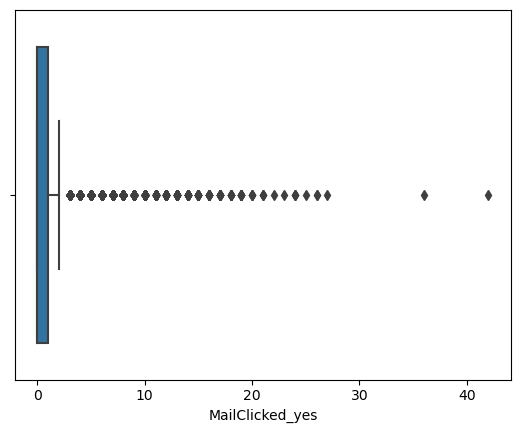

In [81]:
sns.boxplot(x=Customer_Total["MailClicked_yes"])

In [82]:
tenth_percentile=np.percentile(Customer_Total['MailClicked_yes'],10)
ninetieth_percentile=np.percentile(Customer_Total['MailClicked_yes'],90)
print(tenth_percentile,ninetieth_percentile)
Customer_Total['MailClicked_yes']=np.where(Customer_Total['MailClicked_yes']<tenth_percentile,tenth_percentile,Customer_Total['MailClicked_yes']) 
Customer_Total['MailClicked_yes']=np.where(Customer_Total['MailClicked_yes']>ninetieth_percentile,ninetieth_percentile,Customer_Total['MailClicked_yes'])

0.0 4.0


**CustomizedEmail**

<AxesSubplot:xlabel='CustomizedEmail'>

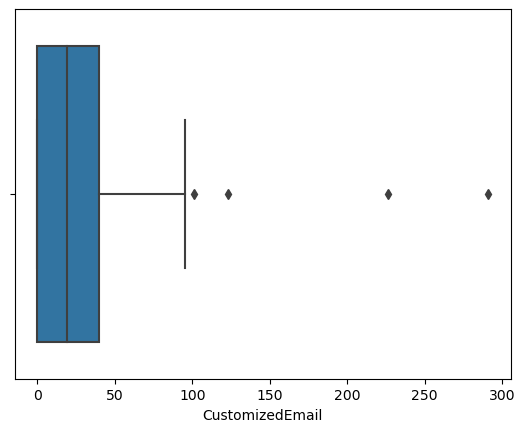

In [85]:
sns.boxplot(x=Customer_Total["CustomizedEmail"])

In [86]:
tenth_percentile=np.percentile(Customer_Total['CustomizedEmail'],10)
ninetieth_percentile=np.percentile(Customer_Total['CustomizedEmail'],90)
print(tenth_percentile,ninetieth_percentile)
Customer_Total['CustomizedEmail']=np.where(Customer_Total['CustomizedEmail']<tenth_percentile,tenth_percentile,Customer_Total['CustomizedEmail']) 
Customer_Total['CustomizedEmail']=np.where(Customer_Total['CustomizedEmail']>ninetieth_percentile,ninetieth_percentile,Customer_Total['CustomizedEmail'])

0.0 46.0


**TotalNoOfOrders**

<AxesSubplot:xlabel='TotalNoOfOrders'>

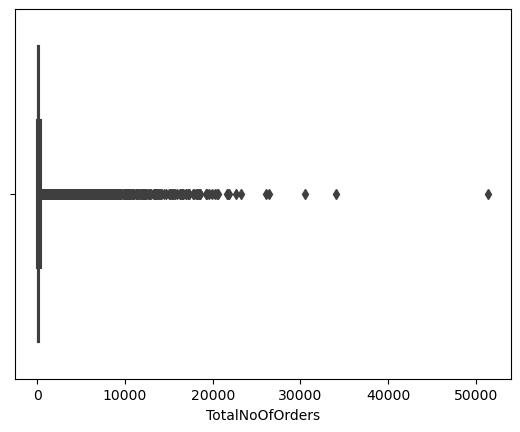

In [87]:
sns.boxplot(x=Customer_Total["TotalNoOfOrders"])

In [88]:
tenth_percentile=np.percentile(Customer_Total['TotalNoOfOrders'],10)
ninetieth_percentile=np.percentile(Customer_Total['TotalNoOfOrders'],90)
print(tenth_percentile,ninetieth_percentile)
Customer_Total['TotalNoOfOrders']=np.where(Customer_Total['TotalNoOfOrders']<tenth_percentile,tenth_percentile,Customer_Total['TotalNoOfOrders']) 
Customer_Total['TotalNoOfOrders']=np.where(Customer_Total['TotalNoOfOrders']>ninetieth_percentile,ninetieth_percentile,Customer_Total['TotalNoOfOrders'])

36.0 613.1000000000022


In [92]:
#converting categorical to numerical by replacing 'Low', 'High','Medium' by 0, 1 and 2
Customer_Total['RetentionPotential'].replace(['Low', 'High','Medium'],[0, 1, 2], inplace=True)

In [93]:
Customer_Total

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,DateOfOrder,TotalNoOfOrders,RetentionPotential
0,C16368,CITY2,28-09-2012,0,0,0,Monday,0.0,19.0,28.0,1.0,29.0,2013-08-11,36.00,1
1,C20345,CITY2,19-12-2010,1,1,1,Friday,7.0,19.0,45.0,4.0,46.0,2011-04-01,613.01,0
2,C17683,CITY2,03-10-2010,0,0,0,Wednesday,0.0,1.0,0.0,0.0,0.0,2010-12-01,443.00,2
3,C18647,CITY4,27-11-2010,0,0,0,Monday,3.0,19.0,26.0,4.0,30.0,2010-11-29,613.01,0
4,C36692,CITY2,04-12-2009,1,1,0,Friday,46.0,19.0,45.0,4.0,46.0,2011-09-21,613.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,17-01-2018,1,1,0,Friday,0.0,1.0,0.0,0.0,0.0,2018-01-17,41.00,0
23816,C12197,CITY3,17-01-2018,1,0,1,Friday,0.0,1.0,0.0,0.0,0.0,2018-01-17,56.00,0
23817,C40967,CITY3,17-01-2018,1,0,0,Saturday,0.0,1.0,0.0,0.0,0.0,2018-01-17,36.00,0
23818,C36140,CITY3,17-01-2018,1,1,0,Saturday,2.0,7.0,5.0,3.0,8.0,2018-01-17,100.00,0


In [94]:
Customer_Total.dtypes

CustomerID               object
City                     object
DateOfRegistration       object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
MailOpened_no           float64
MailOpened_yes          float64
MailClicked_no          float64
MailClicked_yes         float64
CustomizedEmail         float64
DateOfOrder              object
TotalNoOfOrders         float64
RetentionPotential        int64
dtype: object

In [95]:
Customer_Total.City.value_counts()

CITY4    9143
CITY2    6879
CITY3    6490
CITY1    1308
Name: City, dtype: int64

In [97]:
#converting categorical to numerical by replacing 'Low', 'High','Medium' by 0, 1 and 2
Customer_Total['City'].replace(['CITY1', 'CITY2','CITY3','CITY4'],[0, 1, 2,3], inplace=True)

In [99]:
Customer_Total.dtypes

CustomerID               object
City                      int64
DateOfRegistration       object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
MailOpened_no           float64
MailOpened_yes          float64
MailClicked_no          float64
MailClicked_yes         float64
CustomizedEmail         float64
DateOfOrder              object
TotalNoOfOrders         float64
RetentionPotential        int64
dtype: object

In [100]:
Customer_Total.PreferredDeliveryDay.value_counts()

Tuesday      5343
Monday       5300
Friday       4167
Thursday     4043
Wednesday    3778
Saturday     1003
Sunday        186
Name: PreferredDeliveryDay, dtype: int64

In [102]:
#categorical columns converting using get_dummies
Customer_Total = pd.get_dummies(Customer_Total, columns=['PreferredDeliveryDay'])

In [103]:
Customer_Total

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,...,DateOfOrder,TotalNoOfOrders,RetentionPotential,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C16368,1,28-09-2012,0,0,0,0.0,19.0,28.0,1.0,...,2013-08-11,36.00,1,0,1,0,0,0,0,0
1,C20345,1,19-12-2010,1,1,1,7.0,19.0,45.0,4.0,...,2011-04-01,613.01,0,1,0,0,0,0,0,0
2,C17683,1,03-10-2010,0,0,0,0.0,1.0,0.0,0.0,...,2010-12-01,443.00,2,0,0,0,0,0,0,1
3,C18647,3,27-11-2010,0,0,0,3.0,19.0,26.0,4.0,...,2010-11-29,613.01,0,0,1,0,0,0,0,0
4,C36692,1,04-12-2009,1,1,0,46.0,19.0,45.0,4.0,...,2011-09-21,613.01,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,1,17-01-2018,1,1,0,0.0,1.0,0.0,0.0,...,2018-01-17,41.00,0,1,0,0,0,0,0,0
23816,C12197,2,17-01-2018,1,0,1,0.0,1.0,0.0,0.0,...,2018-01-17,56.00,0,1,0,0,0,0,0,0
23817,C40967,2,17-01-2018,1,0,0,0.0,1.0,0.0,0.0,...,2018-01-17,36.00,0,0,0,1,0,0,0,0
23818,C36140,2,17-01-2018,1,1,0,2.0,7.0,5.0,3.0,...,2018-01-17,100.00,0,0,0,1,0,0,0,0


In [104]:
Customer_Total = Customer_Total.drop(['DateOfRegistration','DateOfOrder'], axis=1)

In [105]:
Customer_Total

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,MailOpened_no,MailOpened_yes,MailClicked_no,MailClicked_yes,CustomizedEmail,TotalNoOfOrders,RetentionPotential,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C16368,1,0,0,0,0.0,19.0,28.0,1.0,29.0,36.00,1,0,1,0,0,0,0,0
1,C20345,1,1,1,1,7.0,19.0,45.0,4.0,46.0,613.01,0,1,0,0,0,0,0,0
2,C17683,1,0,0,0,0.0,1.0,0.0,0.0,0.0,443.00,2,0,0,0,0,0,0,1
3,C18647,3,0,0,0,3.0,19.0,26.0,4.0,30.0,613.01,0,0,1,0,0,0,0,0
4,C36692,1,1,1,0,46.0,19.0,45.0,4.0,46.0,613.01,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,1,1,1,0,0.0,1.0,0.0,0.0,0.0,41.00,0,1,0,0,0,0,0,0
23816,C12197,2,1,0,1,0.0,1.0,0.0,0.0,0.0,56.00,0,1,0,0,0,0,0,0
23817,C40967,2,1,0,0,0.0,1.0,0.0,0.0,0.0,36.00,0,0,0,1,0,0,0,0
23818,C36140,2,1,1,0,2.0,7.0,5.0,3.0,8.0,100.00,0,0,0,1,0,0,0,0


In [106]:
Customer_Total.dtypes

CustomerID                         object
City                                int64
OnlineCommunication                 int64
AutomaticRefill                     int64
DoorstepDelivery                    int64
MailOpened_no                     float64
MailOpened_yes                    float64
MailClicked_no                    float64
MailClicked_yes                   float64
CustomizedEmail                   float64
TotalNoOfOrders                   float64
RetentionPotential                  int64
PreferredDeliveryDay_Friday         uint8
PreferredDeliveryDay_Monday         uint8
PreferredDeliveryDay_Saturday       uint8
PreferredDeliveryDay_Sunday         uint8
PreferredDeliveryDay_Thursday       uint8
PreferredDeliveryDay_Tuesday        uint8
PreferredDeliveryDay_Wednesday      uint8
dtype: object

In [107]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [108]:
X = Customer_Total.drop(['RetentionPotential'], axis=1)
y = Customer_Total['RetentionPotential']

In [109]:
# Split the data into training and testing sets
train = Customer_Total.sample(frac=0.8, random_state=42)
test = Customer_Total.drop(train.index)

In [110]:
# Split the training and testing data into features and labels
X_train = train.drop(['CustomerID', 'RetentionPotential'], axis=1).values
y_train = train['RetentionPotential'].values
X_test = test.drop(['CustomerID', 'RetentionPotential'], axis=1).values
y_test = test['RetentionPotential'].values

In [111]:
# create an instance of the StandardScaler
scaler = StandardScaler()

# fit the scaler to your data
scaler.fit(X_train)

# transform your data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [112]:
class NaiveBayes:
    def __init__(self):
        self.prior_probs = {}
        self.likelihood_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute prior probabilities
        for c in self.classes:
            self.prior_probs[c] = np.sum(y == c) / n_samples

        # Compute likelihood probabilities
        for c in self.classes:
            X_c = X[y == c]
            self.likelihood_probs[c] = (X_c.sum(axis=0) + 1) / (np.sum(X_c) + n_features)

    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.prior_probs[c])
            likelihood = np.log(self.likelihood_probs[c])
            posterior = np.sum(likelihood * X, axis=1) + prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]
    
def accuracy_score(y_true, y_pred):
        
        accuracy = np.sum(y_true == y_pred)/len(y_true) *100
        return accuracy

In [113]:
nb = NaiveBayes()
nb.fit(X_train_scaled,y_train)
predictions = nb.predict(X_test_scaled)
#predictions=predictions.reshape(-1,1)
print("Naive Bayes classification accuracy ",accuracy_score(y_test,predictions))

Naive Bayes classification accuracy  81.17128463476071


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_18604\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])


In [114]:
def cross_val_score(nb, X, y, k=5):
    scores = []
    n = len(y)
    idx = np.arange(n)
    np.random.shuffle(idx)
    for i in range(k):
        test_idx = idx[int(i * n / k):int((i + 1) * n / k)]
        train_idx = np.concatenate([idx[:int(i * n / k)], idx[int((i + 1) * n / k):]])
        X_train_scaled, y_train = X[train_idx], y[train_idx]
        X_test_scaled, y_test = X[test_idx], y[test_idx]
        nb.fit(X_train_scaled, y_train)
        y_pred = nb.predict(X_test_scaled)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)

In [115]:
best_score = 0
best_alpha = None

for alpha in [0.1, 0.01, 0.001]:
    nb = NaiveBayes()
    scores = cross_val_score(nb, X_train_scaled, y_train, k=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# Train and evaluate the model with the best hyperparameters
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"best_alpha: {best_alpha}")
print(f"best_score: {best_score}")

Accuracy: 81.17128463476071
best_alpha: 0.01
best_score: 80.38412718691654


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_18604\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])
